In [87]:
import pandas as pd
import sqlite3 as sql3
import matplotlib.pyplot as plt
import seaborn as sns
# The sqlite3 module in Python is a built-in module 
# that provides an interface to interact with SQLite databases using Python code.
database = 'sql-murder-mystery.db'
conn = sql3.connect(database)

In [88]:
# show all tables in this database
tables_query = "SELECT name FROM sqlite_master WHERE type='table'"

tables_df = pd.read_sql_query(tables_query, conn)
print(tables_df)

                     name
0      crime_scene_report
1         drivers_license
2                  person
3  facebook_event_checkin
4               interview
5      get_fit_now_member
6    get_fit_now_check_in
7                  income
8                solution


In [89]:
pd.set_option("display.max_colwidth", None)

# show all column in crime_scene_report table
showallcrime="""
SELECT *
FROM crime_scene_report;

"""
pd.read_sql_query(showallcrime,conn)

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180115,murder,Life? Dont talk to me about life.,Albany
2,20180115,murder,"Mama, I killed a man, put a gun against his head...",Reno
3,20180215,murder,REDACTED REDACTED REDACTED,SQL City
4,20180215,murder,Someone killed the guard! He took an arrow to the knee!,SQL City
...,...,...,...,...
1223,20180430,bribery,\n,Garden Grove
1224,20180430,fraud,‘Why not?’ said the March Hare.\n,Houma
1225,20180430,assault,\n,Fontana
1226,20180501,assault,"be NO mistake about it: it was neither more nor less than a pig, and she\n",Trenton


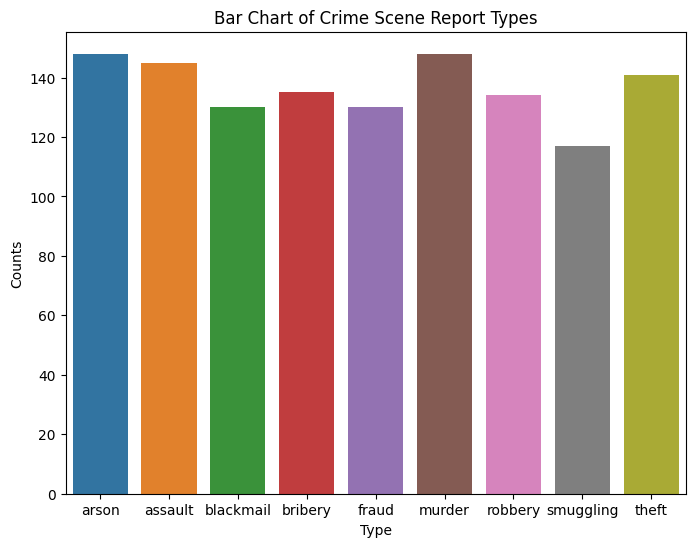

In [90]:
# Write your SQL query to retrieve the data from the 'crime_scene_report' table
showcrimetype = "SELECT type, COUNT(*) AS count FROM crime_scene_report GROUP BY type"

# Use pandas to execute the query and retrieve the data into a DataFrame
data = pd.read_sql_query(showcrimetype, conn)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar chart using seaborn
sns.barplot(x='type', y='count', data=data)

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Counts')
plt.title('Bar Chart of Crime Scene Report Types')
plt.show()



In [91]:
showmurdercity="""
SELECT type, city
FROM crime_scene_report
WHERE type = 'murder'
"""
pd.read_sql_query(showmurdercity,conn)

,type,city
0,murder,Albany
1,murder,Reno
2,murder,SQL City
3,murder,SQL City
4,murder,Memphis
...,...,...
143,murder,St. Petersburg
144,murder,Appleton
145,murder,Toledo
146,murder,Spokane


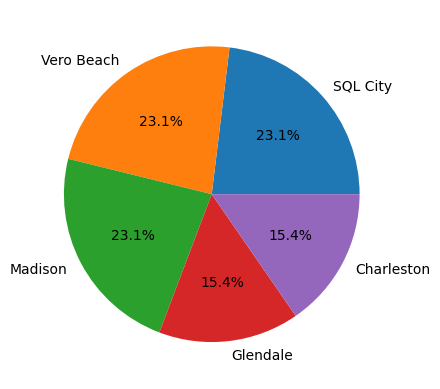

In [92]:
showmurderstat="""
SELECT city
FROM crime_scene_report
WHERE type = 'murder'
"""
murderstat=pd.read_sql_query(showmurderstat,conn)

# count occurance of each cities
city_counts=murderstat['city'].value_counts()

# retrieve 5 top cities
top_cities = city_counts.head(5)
'''
# total count of city occurance
total_occurrences= top_cities.values

# Add total count values to the pie chart
for i, v in enumerate(total_occurrences):
    plt.text(i, 0, str(v), color='black', ha='center', va='center')
'''
# create the pie chart
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%')
plt.show()



In [93]:
# show all column in crime_scene_report table
showalllicense="""
SELECT *
FROM drivers_license;

"""
pd.read_sql_query(showalllicense,conn)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,100280,72,57,brown,red,male,P24L4U,Acura,MDX
1,100460,63,72,brown,brown,female,XF02T6,Cadillac,SRX
2,101029,62,74,green,green,female,VKY5KR,Scion,xB
3,101198,43,54,amber,brown,female,Y5NZ08,Nissan,Rogue
4,101255,18,79,blue,grey,female,5162Z1,Lexus,GS
...,...,...,...,...,...,...,...,...,...
10002,999923,19,77,amber,black,female,5L0ZI4,GMC,Sierra 3500
10003,999940,71,61,green,green,male,1B8QN8,Mitsubishi,Eclipse
10004,999981,67,69,brown,blue,female,1684K3,Land Rover,LR2
10005,999986,49,58,green,grey,male,F8F64H,Lexus,LS


In [94]:
'''
show driver which categorize as a young driver. here I categorize into 3 cluster
cluster 1 'young' = <25
cluster 2 'middle' = 25-50
cluster 3 'old' = >50
and has one of car_make = hyundai, suzuki, mitsubishi
'''
showyouthpref="""
SELECT age, gender, car_make
FROM drivers_license
WHERE age < 25 AND car_make IN ('Hyundai', 'Suzuki', 'Mitsubishi');
"""

pd.read_sql_query(showyouthpref, conn)

,age,gender,car_make
0,21,male,Suzuki
1,18,female,Mitsubishi
2,20,female,Hyundai
3,18,female,Suzuki
4,19,female,Hyundai
...,...,...,...
68,19,female,Mitsubishi
69,21,male,Suzuki
70,21,female,Mitsubishi
71,23,male,Hyundai


In [95]:
'''
count ratio of Female and Male 
'''

'\ncount ratio of Female and Male \n'